<a href="https://colab.research.google.com/github/CarlosTertuliano/imersao_dados_4/blob/main/imersao_dados_4_dia_2_alura.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tratamendo de dados e primeiros gráficos

---



In [100]:
import pandas as pd
url = "https://gist.githubusercontent.com/tgcsantos/3bdb29eba6ce391e90df2b72205ba891/raw/22fa920e80c9fa209a9fccc8b52d74cc95d1599b/dados_imoveis.csv"
dados = pd.read_csv(url)

dados.head()

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000


Utilizaremos a função *info( )* para que possamos ter uma vizualização geral dos dados que temos. Observando os tipos dos dados e a quantidade de valores não nulos.

In [101]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10008 entries, 0 to 10007
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Rua        6574 non-null   object
 1   Bairro     9996 non-null   object
 2   Cidade     10008 non-null  object
 3   Metragem   10008 non-null  int64 
 4   Quartos    10008 non-null  int64 
 5   Banheiros  10008 non-null  int64 
 6   Vagas      10008 non-null  int64 
 7   Valor      10008 non-null  object
dtypes: int64(4), object(4)
memory usage: 625.6+ KB


Vimos anteriormente que diversas ruas e bairros estão com valores nulos. Porém o maior problema para agora é que os indíces da coluna "Valor" estão sendo considerados como "*object*", impossibilitando que possamos retiramr mais informções a partir desses dados como: média, mínimo, máximo, valor do metro por bairro, entre outras coisas.

Portanto iremos tratar esses dados para que se tornem valores numéricos.

In [102]:
dados [["Moeda", "Valor_anuncio", "Tipo_anuncio"]] = dados["Valor"].str.split(expand = True)

dados.head()

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Moeda,Valor_anuncio,Tipo_anuncio
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000,R$,7.000.000,None
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000,R$,3.700.000,None
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000,R$,380.000,None
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000,R$,685.000,None
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000,R$,540.000,None


Aparentemente já está tudo certo e podemos prosseguir com as nossas análises...⚠️⚠️⚠️

Nada disso, apesar de não ter sido mostrado na tabela acima já tinhamos visto que alguns valores possuiam mais informações do que tipo da moeda e o valor. Observe que na coluna "Tipo_anuncio" existe mais de um valor

In [103]:
dados["Valor"].str.split(expand = True)[2].unique()

array([None, '/Mês', '/Ano', '/Dia'], dtype=object)

Pelo visto nos dados que nos foram passados também tinham alguns anúncios de aluguel e queremos saber apenas as informações a respeito dos imóveis a venda. Vamos retirar esses valores indesejados. 

In [104]:
dados_vendas = dados[dados["Tipo_anuncio"].isnull()]

In [105]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10008 entries, 0 to 10007
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Rua            6574 non-null   object
 1   Bairro         9996 non-null   object
 2   Cidade         10008 non-null  object
 3   Metragem       10008 non-null  int64 
 4   Quartos        10008 non-null  int64 
 5   Banheiros      10008 non-null  int64 
 6   Vagas          10008 non-null  int64 
 7   Valor          10008 non-null  object
 8   Moeda          10008 non-null  object
 9   Valor_anuncio  10008 non-null  object
 10  Tipo_anuncio   852 non-null    object
dtypes: int64(4), object(7)
memory usage: 860.2+ KB


In [106]:
dados_vendas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9156 entries, 0 to 10007
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Rua            6107 non-null   object
 1   Bairro         9146 non-null   object
 2   Cidade         9156 non-null   object
 3   Metragem       9156 non-null   int64 
 4   Quartos        9156 non-null   int64 
 5   Banheiros      9156 non-null   int64 
 6   Vagas          9156 non-null   int64 
 7   Valor          9156 non-null   object
 8   Moeda          9156 non-null   object
 9   Valor_anuncio  9156 non-null   object
 10  Tipo_anuncio   0 non-null      object
dtypes: int64(4), object(7)
memory usage: 858.4+ KB


Tudo certo! Já podemos ver que o número de linhas diminuiu de um conjunto de dados para o outro, ou seja, a exclusão dos valores indesejados foi um sucesso.

Porém ainda temos um problema, o valor do anúncio ainda está sendo considerado como objeto  😨 

Sem desespero, podemos resolver isso.

In [107]:
dados_vendas["Valor_anuncio"] = dados_vendas["Valor_anuncio"].str.replace('.', '').astype(float)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [108]:
dados_vendas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9156 entries, 0 to 10007
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Rua            6107 non-null   object 
 1   Bairro         9146 non-null   object 
 2   Cidade         9156 non-null   object 
 3   Metragem       9156 non-null   int64  
 4   Quartos        9156 non-null   int64  
 5   Banheiros      9156 non-null   int64  
 6   Vagas          9156 non-null   int64  
 7   Valor          9156 non-null   object 
 8   Moeda          9156 non-null   object 
 9   Valor_anuncio  9156 non-null   float64
 10  Tipo_anuncio   0 non-null      object 
dtypes: float64(1), int64(4), object(6)
memory usage: 858.4+ KB


In [109]:
dados_vendas.describe()

,Metragem,Quartos,Banheiros,Vagas,Valor_anuncio
count,9156.00,9156.00,9156.00,9156.00,9156.00
mean,434.42,3.45,3.80,3.96,3052202.96
std,7856.42,1.05,1.97,2.60,3944208.19
min,10.00,1.00,1.00,1.00,13000.00
25%,168.00,3.00,2.00,2.00,890000.00
50%,276.00,3.00,4.00,4.00,1800000.00
75%,450.00,4.00,5.00,5.00,3500000.00
max,750000.00,16.00,40.00,50.00,65000000.00


Os valores já estão sendo tratados como dados numéricos, já podemos realizar operações com eles. Porém eles estão com uma notação estranha, vejamos o que podemos fazer para melhorar isso.

In [110]:
pd.set_option("display.precision", 2)
pd.set_option("display.float_format", lambda x: '%.2f' % x)

In [111]:
dados_vendas.describe()

,Metragem,Quartos,Banheiros,Vagas,Valor_anuncio
count,9156.00,9156.00,9156.00,9156.00,9156.00
mean,434.42,3.45,3.80,3.96,3052202.96
std,7856.42,1.05,1.97,2.60,3944208.19
min,10.00,1.00,1.00,1.00,13000.00
25%,168.00,3.00,2.00,2.00,890000.00
50%,276.00,3.00,4.00,4.00,1800000.00
75%,450.00,4.00,5.00,5.00,3500000.00
max,750000.00,16.00,40.00,50.00,65000000.00


Agora sim, já temos os dados da forma que queremos usar para trabalhar. Vamos para os desafios  😁

---



# Desafio 1: Criar uma escala de valores em milhões.

In [112]:
dados_vendas["Valor_10^6"] = dados_vendas["Valor_anuncio"]/1000000 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [113]:
dados_vendas[["Valor_anuncio" ,"Valor_10^6"]].head()

,Valor_anuncio,Valor_10^6
0,7000000.00,7.00
1,3700000.00,3.70
2,380000.00,0.38
3,685000.00,0.69
4,540000.00,0.54


Para evitar que o tamanho dos número poluam os gráficos podemos trabalhar com eles em uma determinada escada. Nesse caso para vermos os valores reais teriamos que multiplicar os dados da coluna "*Valor_10^6*" por 10^6



---

# Desafio 2: Deixar o gráfico do histograma de valores legível

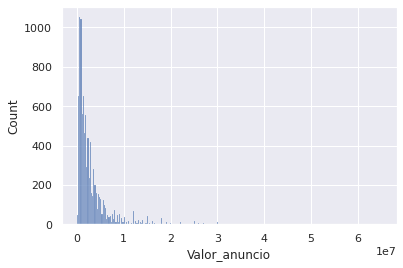

In [114]:
import seaborn as sns

sns.set()

sns.histplot(data = dados_vendas, x = "Valor_anuncio")

A partir das configurações padrões o histograma seria mostrado dessa forma, vamos ver se podemos melhorar isso dai.

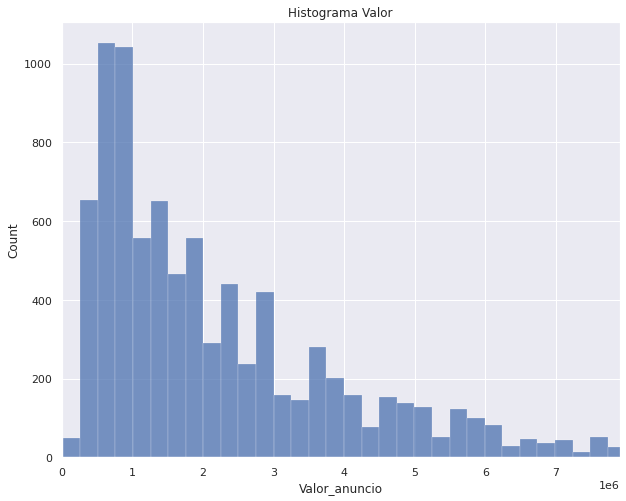

In [115]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
ax = sns.histplot(data = dados_vendas, x = "Valor_anuncio")

ax.set_title("Histograma Valor")

plt.xlim((-50, 7900000))
plt.show()

Até que melhorou um pouco, só que ainda não está tão claro o que temos ai. Por exemplo, uma coisa que podemos nos perguntar é: o que esse *count* representa?

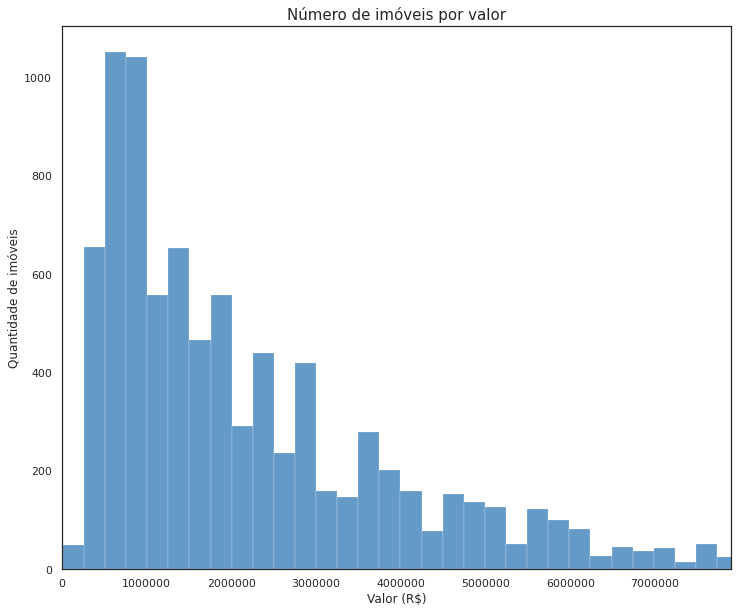

In [116]:

plt.figure(figsize=(12, 10))

sns.set_style("white")

sns.set_palette("RdBu_r")

bx = sns.histplot(data = dados_vendas, x = "Valor_anuncio")



bx.set_title("Número de imóveis por valor", size = 15)
bx.set_xlabel( "Valor (R$)" , size = 12 )
bx.set_ylabel( "Quantidade de imóveis" , size = 12 )


plt.ticklabel_format(style='plain', axis='x')

plt.xlim((-50, 7900000))
plt.show()

Bem melhor! Agora me diga, o que você entende ao observar esse gráfico?  🤔


---

# Desafio 3: Preço do metro quadrado por bairro e plotar em um gráfico ideal.

In [117]:
dados_bairro = dados_vendas.groupby("Bairro").sum().reset_index()

dados_bairro["Valor_metro"] = dados_bairro["Valor_anuncio"]/dados_bairro["Metragem"]

dados_bairro

,Bairro,Metragem,Quartos,Banheiros,Vagas,Valor_anuncio,Valor_10^6,Valor_metro
0,Aclimação,19447,258,240,230,139292801.00,139.29,7162.69
1,Alto da Boa Vista,3351,33,41,37,19130000.00,19.13,5708.74
2,Alto da Lapa,23940,252,308,320,166653500.00,166.65,6961.30
3,Alto da Mooca,5401,66,52,73,23683400.00,23.68,4385.00
4,Alto de Pinheiros,158616,1453,1782,1827,1764815915.00,1764.82,11126.34
...,...,...,...,...,...,...,...,...
692,Vila Água Funda,761,13,11,13,3260000.00,3.26,4283.84
693,Água Branca,2083,37,39,27,14718000.00,14.72,7065.77
694,Água Fria,1985,34,41,30,11125000.00,11.12,5604.53
695,Água Funda,278,6,5,4,1090000.00,1.09,3920.86


Para melhor visualização retiramos uma amostra aleatória dos nossos dados e iremos observar ela por meio de um gráfico de barras. Nele será possível visualizar a diferença do valor do m² por bairro.

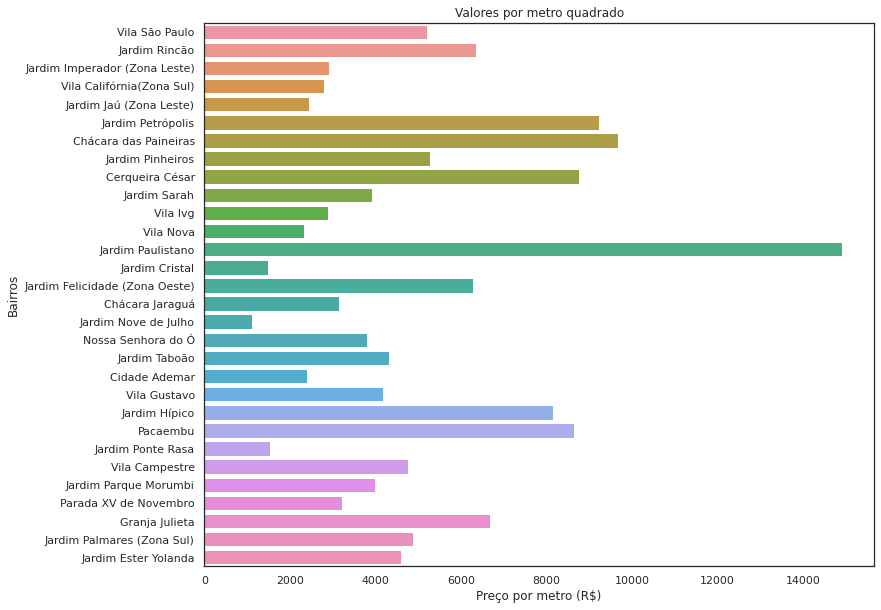

In [118]:
import numpy as np

plt.figure(figsize=(12, 10))

sns.set_style("white")

dados_grafico = dados_bairro.sample(30)

ax = sns.barplot(data = dados_grafico, y = "Bairro", x="Valor_metro")

plt.title("Valores por metro quadrado")
plt.ylabel("Bairros")


plt.xlabel("Preço por metro (R$)")


plt.show()



---

# Desafio 4: Explorar as bibliotecas de visualizações e colocar as suas conclusão

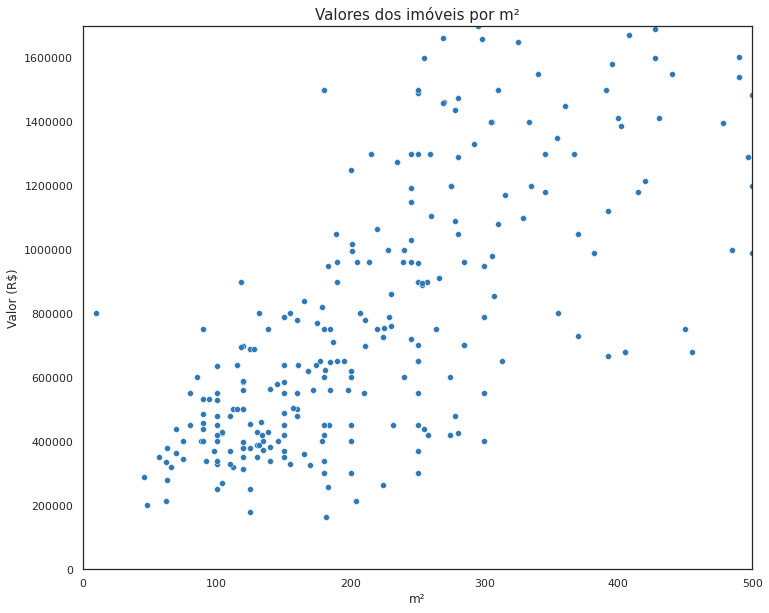

In [119]:
plt.figure(figsize=(12, 10))

sns.set_style("white")

dados_grafico = dados_bairro.groupby("Bairro")["Metragem"].mean().reset_index()



media_quartos = dados_bairro.groupby("Bairro")["Valor_anuncio"].mean().reset_index()

dados_grafico["Valor_anuncio"] = media_quartos["Valor_anuncio"]



ax = sns.scatterplot(data = dados_grafico, x="Metragem", y="Valor_anuncio")

ax.set_title("Valores dos imóveis por m²", size = 15)
ax.set_xlabel( "m²", size = 12 )
ax.set_ylabel( "Valor (R$)" , size = 12 )

plt.ticklabel_format(style='plain', axis='y')

plt.ticklabel_format(style='plain', axis='x')

plt.xlim((0, 500))

plt.ylim((0, 1700000))


plt.show()

Esse é um gráfico de dispersão, a partir dele podemos comparar duas variáveis, nesse caso são o *valor* e o *m²*. Diferente do gráfico de barras não temos como saber quais são os bairros apresentados, porém podemos tirar outro tipo de informações. 

Por exemplo, percebe-se uma maior concentração de imóveis que possuem entre 100m² e 200m² e a maioria deles possui uma média de preço semelhante, porém alguns acabam tendo valores mais elevado que podem ser justificados a partir do gráfico de barras, onde vimos que em alguns bairros o preço do m² é maior que em outros.

Podemos ver também que, normalmente quanto maior o m² maior será o valor do imóvel. É possível fazer essa comparação também a respeito da quantidade de quartos por m², ou a quanitade de banheiros, entre outras associações.


---

# Desafio 5: Pesquisar um visualização para analisar os quartis, mediana e outliers

O tipo de gráfico mais comum para esse tipo de visualização é o **boxplot**, ele é dividido entre quartis, apresenta a mediana e os valores outliers. Exatamente, ele mostra tudo o que precisamos. Segue abaixo um exemplo de um boxplot, para ajudar na compreensão.

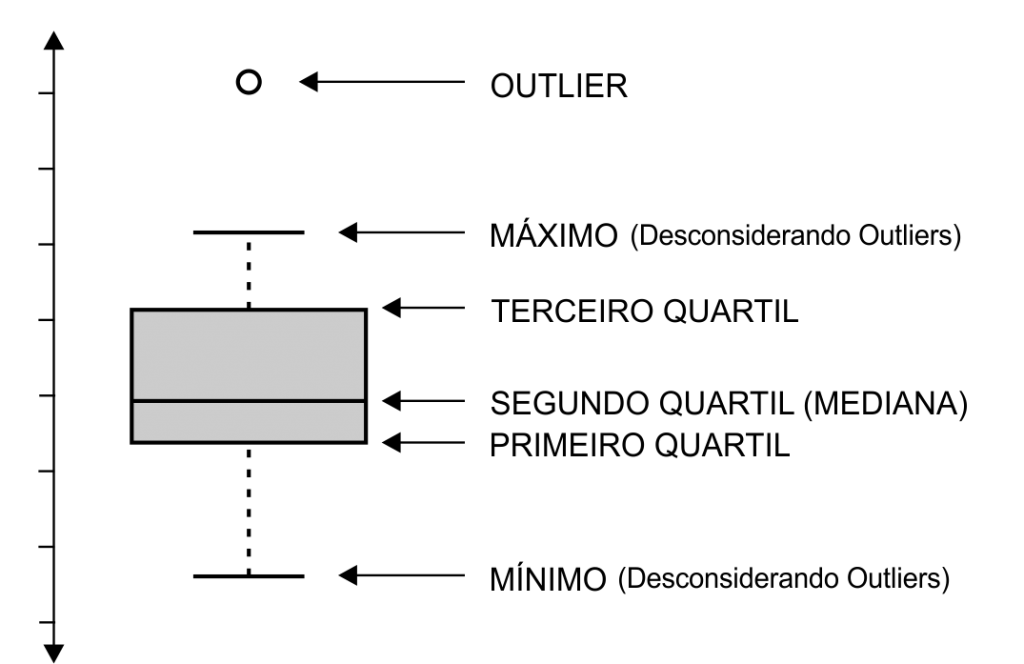

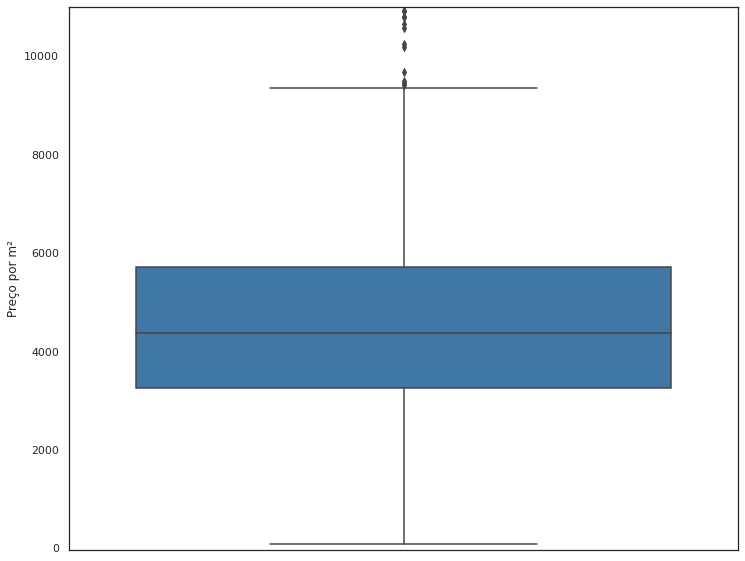

In [120]:
plt.figure(figsize=(12, 10))

sns.set_style("white")

plt.ylim((-50, 11000))

ax = sns.boxplot(data = dados_bairro, y="Valor_metro")

plt.ylabel("Preço por m²")

plt.show()

Mais uma vez trazendo o Preço por m², podemos observar que 75% (quantidade de valores até o terceiro quártil) tem uma média de preço por m² de até R\$ 6.000,00. É visto também que existem alguns bairros que o preço por m² excede o valor de R$ 10.000,00, sendo esses considerados como outliers, ou sejam, são valores que podem ser considerados incorretos ou desprorcionais podem vir a prejudicar no cálculo das médias, entre outras coisas.

Esses outlier podem ser bairros com apenas um imóvel a venda, ou dados informados de forma errada, até mesmo imóveis diferentes (chácaras, sítios, prédios, entre outros) que tenham valores realmente maiores.